### Applying model 
As it is regression problem we will be creating model to calculate FWI

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [27]:
df=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
df["Classes"]=np.where(df['Classes'].str.strip().str.lower()=='not fire',0,1)
# In 167 index there was NAN so imputing it with mean
df['DC']=np.where(df['DC'].isna(),df['DC'].mean(),df['DC'])


In [28]:
#Drop month day and year
df.drop(['day','month','year'],axis=1,inplace=True)

In [29]:
df["Classes"].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [30]:
# Independent and dependent feature generation
X=df.drop('FWI',axis=1)
y=df['FWI']

# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)



In [31]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [32]:
#Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.380467,0.609525,0.458575,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.222255,-0.694976,-0.344365,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.077630,0.015384,0.022529,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.297674,-0.353219,-0.301347,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.512196,0.744270,0.592841,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877730,0.652894,0.981876,0.580530,0.197489
DC,0.380467,-0.222255,0.077630,-0.297674,0.512196,0.877730,1.000000,0.504674,0.940862,0.505553,-0.075404
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.504674,1.000000,0.624038,0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.940862,0.624038,1.000000,0.583094,0.092548
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.505553,0.744568,0.583094,1.000000,0.158763


In [33]:
# Writing Generic method which retrun columns that are highly correlated
def highCorrCol(data, corrThreshold):
    corrColSet=set()
    dataCorr=data.corr()
    for i in range(len(dataCorr.columns)):
        for j in range(i):

            if (abs(dataCorr.iloc[i,j])>corrThreshold):
                colname=dataCorr.columns[i]
                corrColSet.add(colname)
    return corrColSet

# Threshold is set by domain experts
cols=highCorrCol(X_train,.95)

In [34]:
X_train.drop(cols,axis=1,inplace=True)
X_test.drop(cols,axis=1,inplace=True)


In [35]:
X_train.shape

(183, 10)

### Feature Scaling or Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_Scaled=s.fit_transform(X_train)
X_test_Scaled=s.transform(X_test)


#### Drawing Box Plot

Text(0.5, 1.0, 'After Scaling')

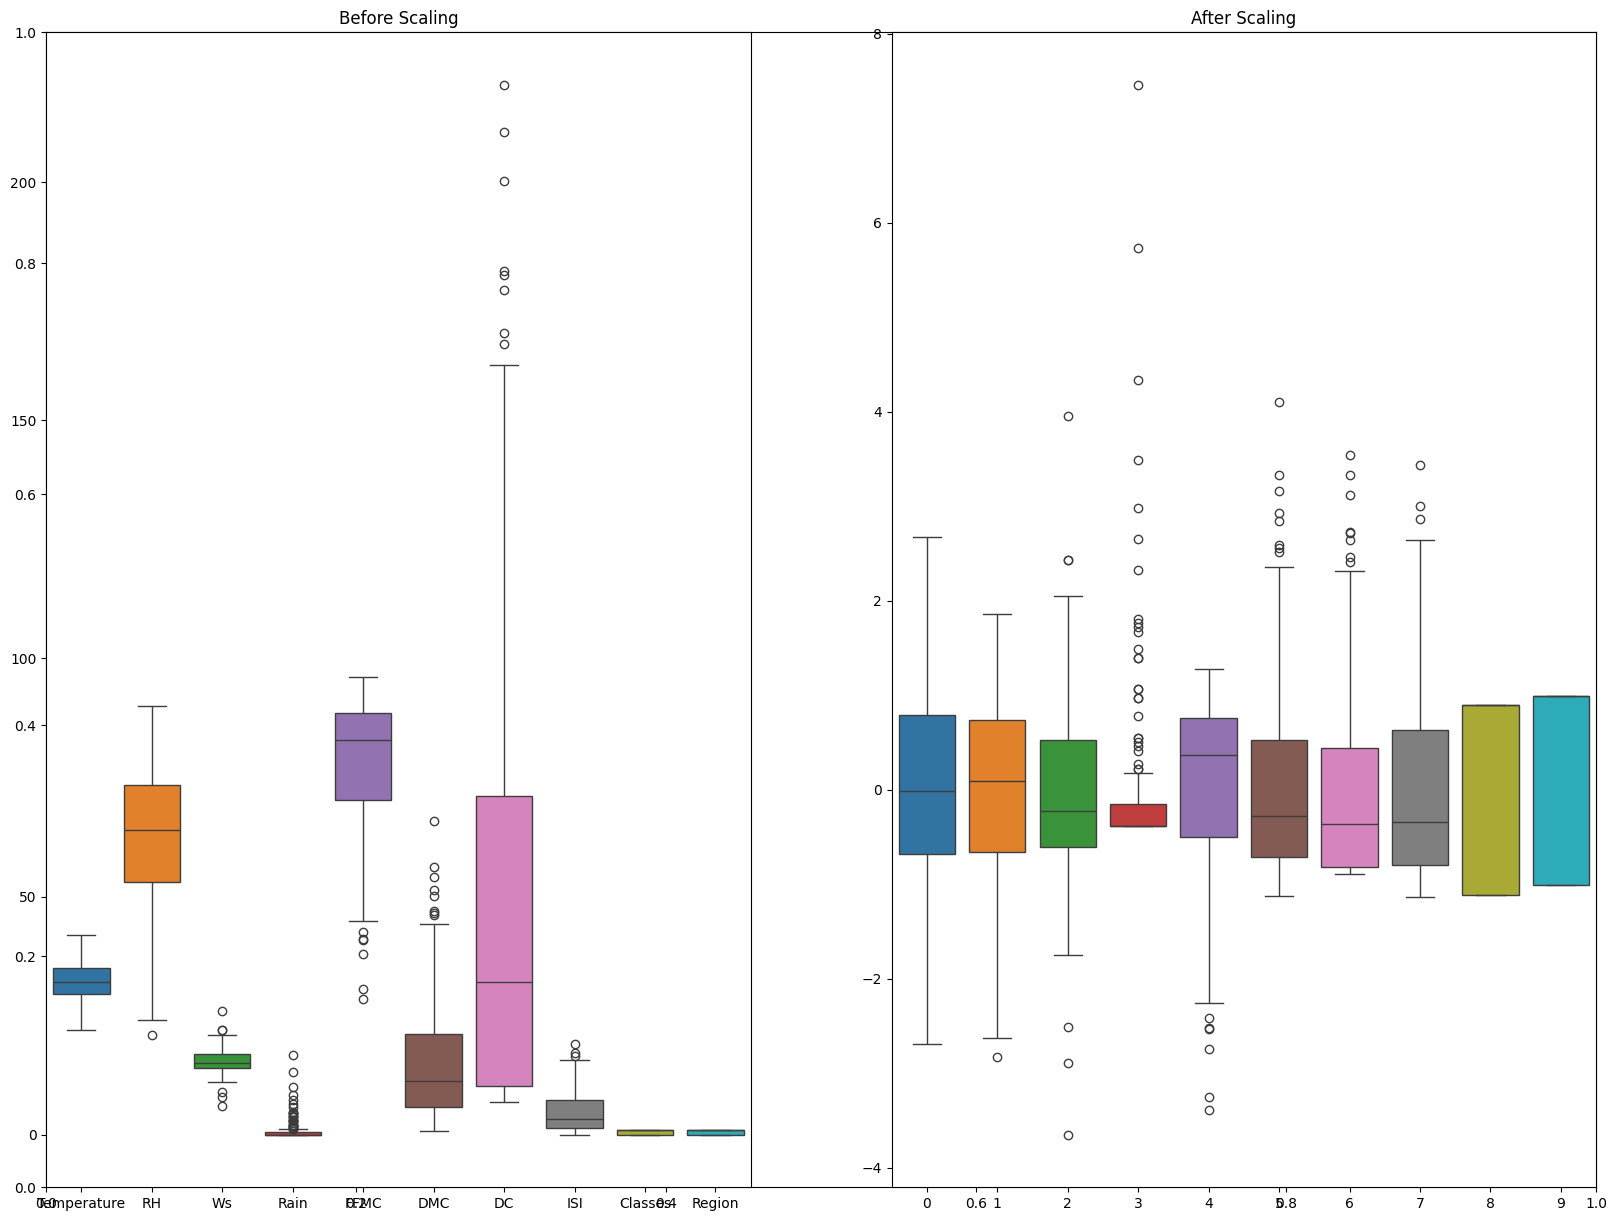

In [37]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20, 15))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_Scaled)
plt.title("After Scaling")

#After Scaling all are in same scale

## Linear Regression

In [38]:
X_test_Scaled.shape

(61, 10)

Mean absolute error 0.6196148578794463
R2 Score 0.9881450996925982


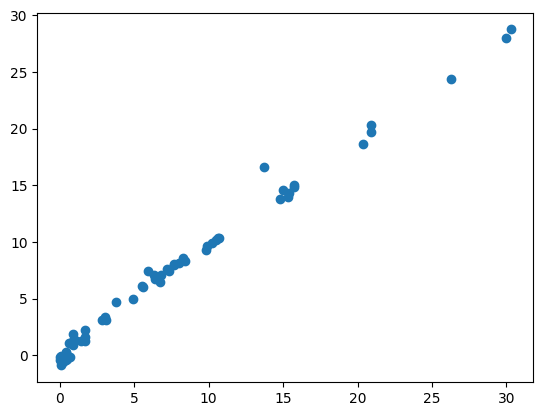

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_Scaled,y_train)
y_pred=linreg.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Lasso

Mean absolute error 1.2327847353342465
R2 Score 0.9489132158788944


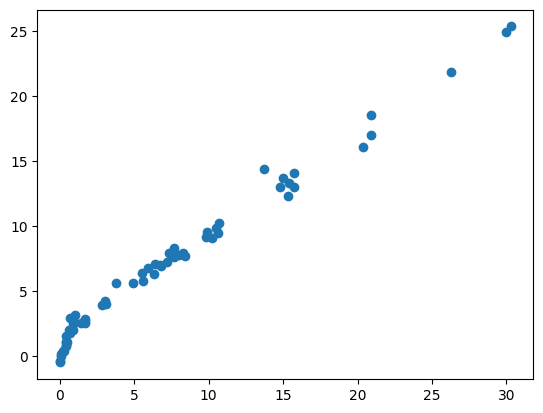

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasoreg=Lasso()
lasoreg.fit(X_train_Scaled,y_train)
y_pred=lasoreg.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Ridge

Mean absolute error 0.6430378659100978
R2 Score 0.9871637900488595


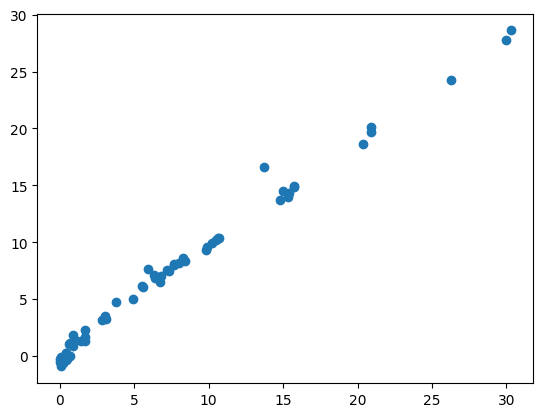

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgreg=Ridge()
ridgreg.fit(X_train_Scaled,y_train)
y_pred=ridgreg.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Elastic net

Mean absolute error 1.8292586367305625
R2 Score 0.8797787182716084


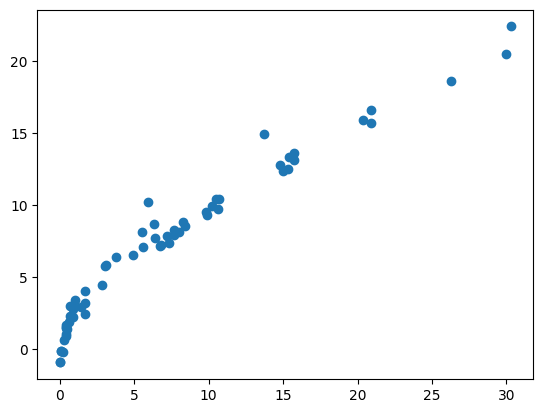

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elsreg=ElasticNet()
elsreg.fit(X_train_Scaled,y_train)
y_pred=elsreg.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Ridge CV
 Ridge vs. RidgeCV (L2 Regularization)
 It is used to avoid over fitting
Ridge regression adds a penalty proportional to the square of the coefficients to reduce model complexity without removing features.


Description: Best when you have many features that all contribute slightly to the output. It shrinks coefficients but never sets them to zero.

Key Parameters:
alpha: Regularization strength. Larger values = more shrinkage.
cv (RidgeCV only): Determines cross-validation folds. By default, 
it uses efficient Leave-One-Out (LOO) cross-validation

Mean absolute error 0.6430378659100978
R2 Score 0.9871637900488595


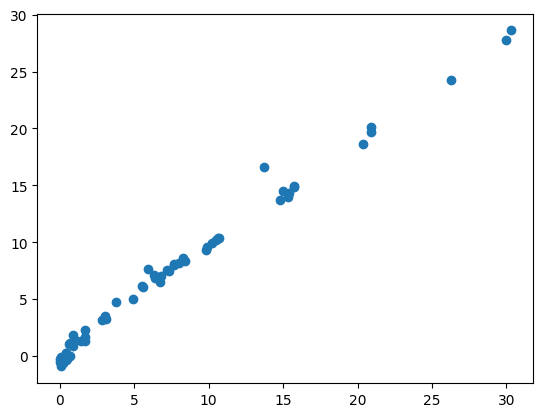

In [43]:
from sklearn.linear_model import Ridge, RidgeCV

# Ridge: Manually set alpha
ridge = Ridge(alpha=1.0)

# RidgeCV: Searches for the best alpha from a list
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train_Scaled,y_train)
y_pred=ridge_cv.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso vs. LassoCV (L1 Regularization)

Lasso adds a penalty proportional to the absolute value of the coefficients. 

Description: Used for feature selection. It can shrink unimportant coefficients to exactly zero, effectively removing them from the model.

Key Parameters:
alpha: Constant that multiplies the L1 term.

n_alphas (LassoCV only): Number of alphas to test along a "regularization path".

max_iter: Maximum number of iterations for the solver to converge

Mean absolute error 0.6446500760062256
R2 Score 0.9870596146944747


c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


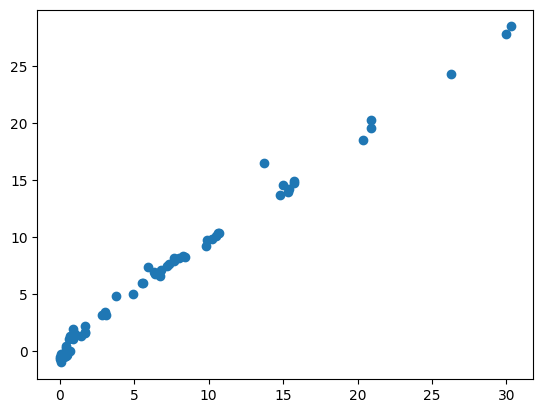

In [44]:
from sklearn.linear_model import Lasso, LassoCV

# Lasso: Manually set alpha
lasso = Lasso(alpha=0.01)

# LassoCV: Automatically finds optimal alpha along a path
lasso_cv = LassoCV(n_alphas=100, cv=5)
lasso_cv.fit(X_train_Scaled,y_train)
y_pred=lasso_cv.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [51]:
#For every alpha 5 fold testing
lasso_cv.mse_path_

array([[58.72595376, 43.54166674, 54.58262678, 72.99542   , 37.06677057],
       [53.53023314, 39.30739311, 50.07610694, 69.9566162 , 32.65746701],
       [48.07440027, 34.76648864, 43.66894885, 63.96928563, 28.42987705],
       [42.58364056, 30.79263468, 38.09661622, 58.67118993, 24.43752283],
       [37.79111551, 27.31363062, 33.25048751, 53.9786631 , 21.04007758],
       [33.60732967, 24.26653617, 29.0358643 , 49.81852512, 18.15489245],
       [29.95386413, 21.59653418, 25.37032425, 44.94986578, 15.7105448 ],
       [26.76262957, 19.25584208, 22.18262564, 39.72724156, 13.64503792],
       [23.97433902, 17.2028111 , 19.41036527, 35.16088881, 11.90533086],
       [21.53736572, 15.40115497, 16.99941585, 31.16662306, 10.44497756],
       [19.40651343, 13.81917296, 14.90270137, 27.67145816,  9.22403629],
       [17.54312246, 12.42928081, 13.07927849, 24.61181159,  8.2080075 ],
       [15.91282015, 11.20739983, 11.49336739, 21.93168469,  7.36693574],
       [14.48589471, 10.13252414, 10.1

### ElasticNet vs. ElasticNetCV (L1 + L2)
ElasticNet is a hybrid that combines both L1 (Lasso) and L2 (Ridge) penalties. 


Description: Best for datasets with correlated features. While Lasso might randomly pick one of several correlated features, ElasticNet tends to keep or reduce them as a group.


Key Parameters:
alpha: Overall regularization strength.

l1_ratio: The "mix" between L1 and L2. 1.0 is pure Lasso, 0.0 is pure Ridge.

alphas (ElasticNetCV): A list or vector of alphas to test

Mean absolute error 0.6766621195647059
R2 Score 0.9856414100684401


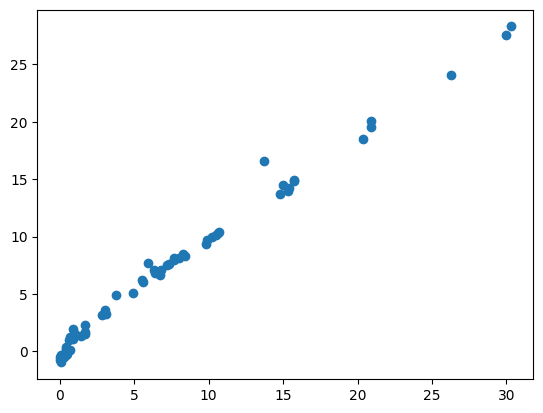

In [52]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

# ElasticNet: Manually set both alpha and the l1_ratio mix
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# ElasticNetCV: Tuned both parameters automatically
# Note: It is often better to test more values close to 1 (Lasso)
enet_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
enet_cv.fit(X_train_Scaled,y_train)
y_pred=enet_cv.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

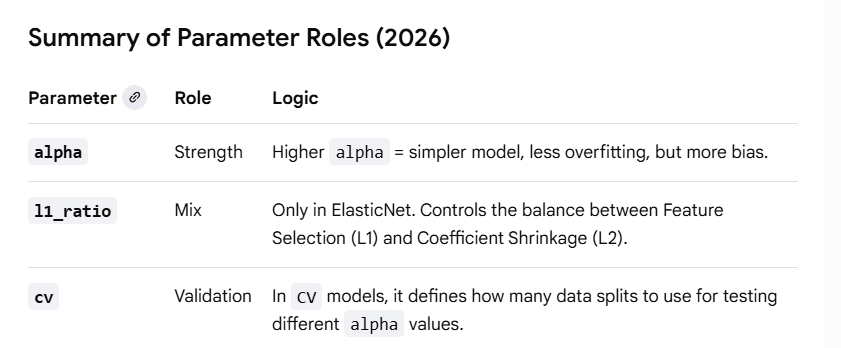